In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway



# **Milestone 1: Data Collection, Exploration, and Preprocessing**

In [2]:
df = pd.read_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/train.csv')
df_test = pd.read_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/test.csv')

In [3]:
df.drop(columns=['Employee ID'], inplace=True)
df_test.drop(columns=['Employee ID'], inplace=True)

In [4]:
df.shape

(59598, 23)

In [5]:
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
df.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       59598 non-null  int64 
 1   Gender                    59598 non-null  object
 2   Years at Company          59598 non-null  int64 
 3   Job Role                  59598 non-null  object
 4   Monthly Income            59598 non-null  int64 
 5   Work-Life Balance         59598 non-null  object
 6   Job Satisfaction          59598 non-null  object
 7   Performance Rating        59598 non-null  object
 8   Number of Promotions      59598 non-null  int64 
 9   Overtime                  59598 non-null  object
 10  Distance from Home        59598 non-null  int64 
 11  Education Level           59598 non-null  object
 12  Marital Status            59598 non-null  object
 13  Number of Dependents      59598 non-null  int64 
 14  Job Level             

In [8]:
df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [9]:
for col in df:
    print(col)
    print(df[col].unique())
    print("\n")

Age
[31 59 24 36 56 38 47 48 57 30 29 40 19 33 49 51 39 54 23 45 42 53 37 34
 25 41 55 21 28 26 52 50 27 58 43 35 46 44 20 18 22 32]


Gender
['Male' 'Female']


Years at Company
[19  4 10  7 41  3 23 16 44  1 12  6 38 22 30  9 37 33 13  5 21 32 34 11
  2 18 27 17 36  8 28 35 14 24 40 15 45 39 20 43 26 29 46 42 25 31 47 48
 49 50 51]


Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']


Monthly Income
[ 5390  5534  8159 ... 12440  2975 12260]


Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']


Job Satisfaction
['Medium' 'High' 'Very High' 'Low']


Performance Rating
['Average' 'Low' 'High' 'Below Average']


Number of Promotions
[2 3 0 1 4]


Overtime
['No' 'Yes']


Distance from Home
[22 21 11 27 71 37 75  5 39 57 51 26 78 30 98 48 17 86 60 10 18 95 23 16
 63 92 58 55 31 32 82  8 74  3 76 47 67 84 14 36 79 52 44 89 64  7 87 24
 15 81 13 35 68 56 73 41 34 29 19 50 62 49 69 33 61 53 72 91 65 93 28 46
 54  9 45 96 94  1 88 25  6 70 12 99  4 97 42 38 90 43 59 85  2 4

In [10]:
df.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       59598 non-null  int64 
 1   Gender                    59598 non-null  object
 2   Years at Company          59598 non-null  int64 
 3   Job Role                  59598 non-null  object
 4   Monthly Income            59598 non-null  int64 
 5   Work-Life Balance         59598 non-null  object
 6   Job Satisfaction          59598 non-null  object
 7   Performance Rating        59598 non-null  object
 8   Number of Promotions      59598 non-null  int64 
 9   Overtime                  59598 non-null  object
 10  Distance from Home        59598 non-null  int64 
 11  Education Level           59598 non-null  object
 12  Marital Status            59598 non-null  object
 13  Number of Dependents      59598 non-null  int64 
 14  Job Level             

In [13]:
categorical_df = df.select_dtypes(include=['object', 'category'])
for col in categorical_df:
    a = df.groupby(col)[col].count()
    a.sort_values(ascending=False, inplace=True)
    total = a.sum()

    print(col)
    for value, count in a.items():
        percent = (count / total) * 100
        print(f"{value}: {percent:.2f}%")
    print("\n")

Gender
Male: 54.93%
Female: 45.07%


Job Role
Technology: 26.02%
Healthcare: 22.89%
Education: 20.96%
Media: 16.06%
Finance: 14.07%


Work-Life Balance
Good: 37.80%
Fair: 30.28%
Excellent: 17.99%
Poor: 13.94%


Job Satisfaction
High: 49.97%
Very High: 20.32%
Medium: 19.83%
Low: 9.88%


Performance Rating
Average: 60.09%
High: 19.95%
Below Average: 15.02%
Low: 4.95%


Overtime
No: 67.36%
Yes: 32.64%


Education Level
Bachelor’s Degree: 29.91%
Associate Degree: 25.03%
Master’s Degree: 20.17%
High School: 19.71%
PhD: 5.18%


Marital Status
Married: 50.18%
Single: 34.96%
Divorced: 14.86%


Job Level
Entry: 40.05%
Mid: 39.86%
Senior: 20.10%


Company Size
Medium: 49.91%
Small: 30.09%
Large: 20.00%


Remote Work
No: 80.94%
Yes: 19.06%


Leadership Opportunities
No: 95.10%
Yes: 4.90%


Innovation Opportunities
No: 83.72%
Yes: 16.28%


Company Reputation
Good: 49.94%
Poor: 20.19%
Fair: 19.83%
Excellent: 10.04%


Employee Recognition
Low: 39.86%
Medium: 30.26%
High: 24.91%
Very High: 4.97%


At

In [14]:
categorical_columns = []

for col in categorical_df:
    categorical_columns.append(col)

print(categorical_columns)

numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_columns = numerical_df.columns.tolist()
print(numerical_columns)

['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']


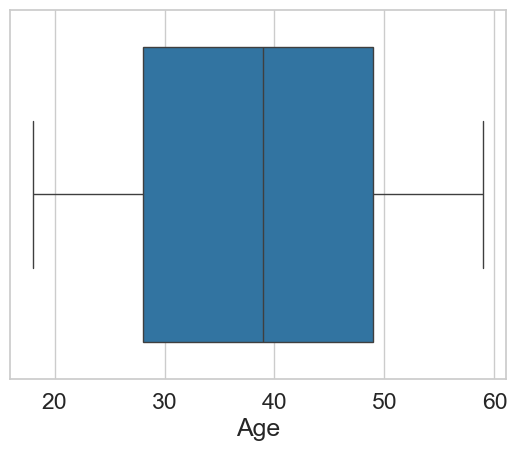

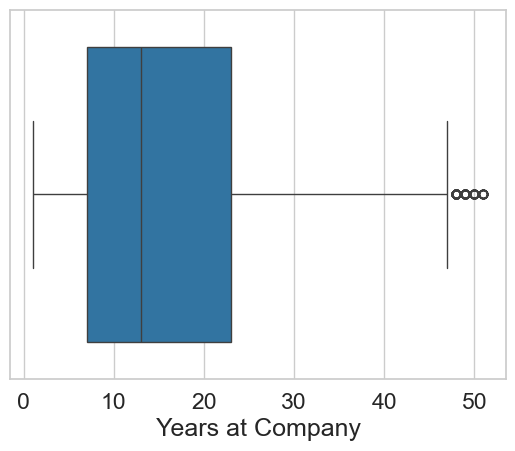

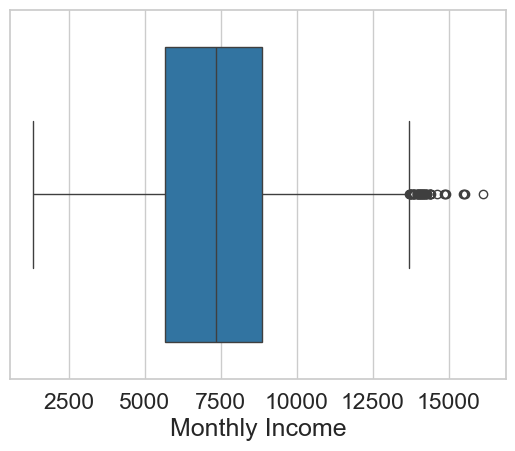

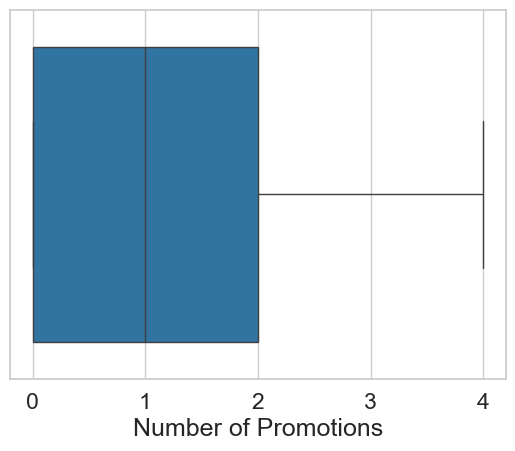

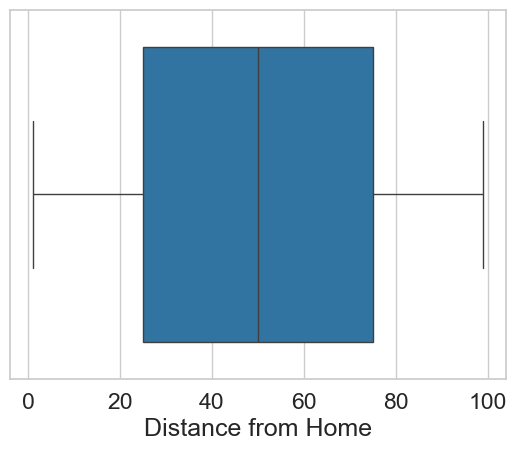

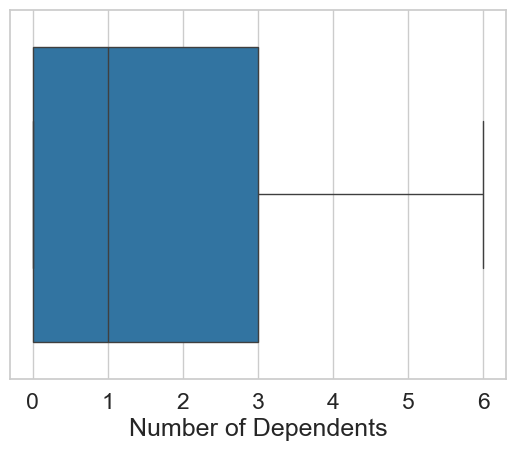

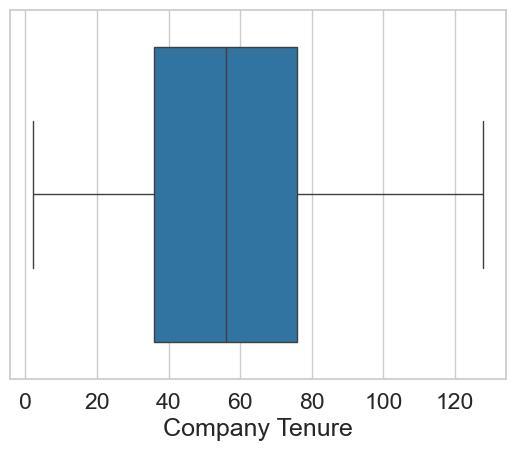

In [15]:
# outliers visualization
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.color_palette("flare", as_cmap=True)
for col in numerical_columns:
    sns.boxplot(data=df, x=col)
    plt.show()

In [16]:
# outliers

for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [17]:
df.shape

(59130, 23)

In [18]:
df.to_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/cleaned_train.csv', index=False)

In [19]:
'''
# feature creation

# 1- Salary_per_Performance:
perf_map = {
    'Low': 1,
    'Below Average': 2,
    'Average': 3,
    'High': 4
}
df['Performance Rating Num'] = df['Performance Rating'].map(perf_map)
df['Salary_per_Performance'] = df['Monthly Income'] / df['Performance Rating Num']

# 2- Tenure_Group
df['Tenure_Group'] = pd.cut(df['Years at Company'],
                            bins=[0, 1, 3, 5, 10, float('inf')],
                            labels=['<1 yr', '1-3 yrs', '3-5 yrs', '5-10 yrs', '10+ yrs'])

# 3- Distance_Overtime
df['Overtime_Binary'] = df['Overtime'].map({'Yes': 1, 'No': 0})
df['Distance_Overtime'] = df['Distance from Home'] * df['Overtime_Binary']

# 4- Performance_Satisfaction
satisfaction_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}
df['Job Satisfaction Num'] = df['Job Satisfaction'].map(satisfaction_map)
df['Performance_Satisfaction'] = df['Performance Rating Num'] * df['Job Satisfaction Num']

# 5- Family_Load
df['Married'] = df['Marital Status'].map(lambda x: 1 if x == 'Married' else 0)
df['Family_Load'] = df['Number of Dependents'] + df['Married']

# 6- Experience_Level
df['Experience_Level'] = df['Company Tenure'] / df['Age']

# 7- Leadership_Score
rep_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
recog_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
df['Company Reputation Num'] = df['Company Reputation'].map(rep_map)
df['Employee Recognition Num'] = df['Employee Recognition'].map(recog_map)
df['Leadership Opportunities Num'] = df['Leadership Opportunities'].map({'No': 0, 'Yes': 1})
df['Leadership_Score'] = df['Company Reputation Num'] + df['Employee Recognition Num'] + df['Leadership Opportunities Num']

# 8- Innovation_Score
df['Innovation Opportunities Num'] = df['Innovation Opportunities'].map({'No': 0, 'Yes': 1})
df['Innovation_Score'] = df['Innovation Opportunities Num'] + df['Job Satisfaction Num']

categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_columns = []
for col in categorical_df:
    categorical_columns.append(col)
print(categorical_columns)

numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_columns = numerical_df.columns.tolist()
print(numerical_columns)
'''


"\n# feature creation\n\n# 1- Salary_per_Performance:\nperf_map = {\n    'Low': 1,\n    'Below Average': 2,\n    'Average': 3,\n    'High': 4\n}\ndf['Performance Rating Num'] = df['Performance Rating'].map(perf_map)\ndf['Salary_per_Performance'] = df['Monthly Income'] / df['Performance Rating Num']\n\n# 2- Tenure_Group\ndf['Tenure_Group'] = pd.cut(df['Years at Company'],\n                            bins=[0, 1, 3, 5, 10, float('inf')],\n                            labels=['<1 yr', '1-3 yrs', '3-5 yrs', '5-10 yrs', '10+ yrs'])\n\n# 3- Distance_Overtime\ndf['Overtime_Binary'] = df['Overtime'].map({'Yes': 1, 'No': 0})\ndf['Distance_Overtime'] = df['Distance from Home'] * df['Overtime_Binary']\n\n# 4- Performance_Satisfaction\nsatisfaction_map = {\n    'Low': 1,\n    'Medium': 2,\n    'High': 3,\n    'Very High': 4\n}\ndf['Job Satisfaction Num'] = df['Job Satisfaction'].map(satisfaction_map)\ndf['Performance_Satisfaction'] = df['Performance Rating Num'] * df['Job Satisfaction Num']\n\n# 5-

In [22]:
# Label Encoding
enc=LabelEncoder()

df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = enc.fit_transform(df[col])
df_encoded  

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,0,2,0,2,0,...,0,1,1,89,0,0,0,0,2,1
1,59,0,4,3,5534,3,0,3,3,0,...,3,1,1,21,0,0,0,1,1,1
2,24,0,10,2,8159,2,0,3,0,0,...,3,1,1,74,0,0,0,3,1,1
3,36,0,7,0,3989,2,0,2,1,0,...,2,1,2,50,1,0,0,2,2,1
4,56,1,41,0,4821,1,3,0,0,1,...,0,2,1,68,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,50,0,12,0,4414,1,0,0,1,1,...,2,2,2,35,0,0,1,3,3,0
59594,18,1,4,2,8040,1,0,2,3,0,...,0,2,1,73,0,0,0,1,2,0
59595,22,0,14,4,7944,1,0,2,0,1,...,2,0,2,29,0,1,0,2,2,1
59596,23,1,8,0,2931,1,3,0,0,0,...,0,0,0,9,0,0,0,2,1,0


In [23]:
df_encoded.to_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/encoded_train.csv', index=False)

In [24]:
# Label Encoding
enc=LabelEncoder()

test_encoded = df_test.copy()
for col in categorical_columns:
    test_encoded[col] = enc.fit_transform(df_test[col])
test_encoded

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,36,1,13,2,8029,0,0,0,1,1,...,1,1,0,22,0,0,0,3,2,1
1,35,1,7,0,4563,2,0,0,1,1,...,4,0,1,27,0,0,0,2,0,0
2,50,1,7,0,5583,1,0,0,3,1,...,2,2,1,76,0,0,1,2,1,1
3,58,1,44,3,5525,1,3,2,0,1,...,4,0,1,96,0,0,0,3,1,0
4,39,1,24,0,4604,2,0,0,0,1,...,6,1,0,45,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,0,42,2,7830,3,2,0,0,1,...,0,2,1,60,0,0,0,3,2,1
14896,30,0,15,0,3856,2,2,0,2,1,...,0,0,1,20,0,0,0,2,2,0
14897,52,1,5,0,5654,2,3,1,0,0,...,4,1,2,7,0,0,0,2,0,0
14898,18,1,4,0,5276,1,0,0,0,0,...,3,1,0,5,0,0,0,3,0,1


In [25]:
test_encoded.to_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/encoded_test.csv', index=False)